**Importing all the required libaries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

**loadining our data**

In [34]:
df = pd.read_csv("/content/gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


**checking the null values in data**


In [35]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**so there are no null values**

<ipython-input-39-30c45d9f8059>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

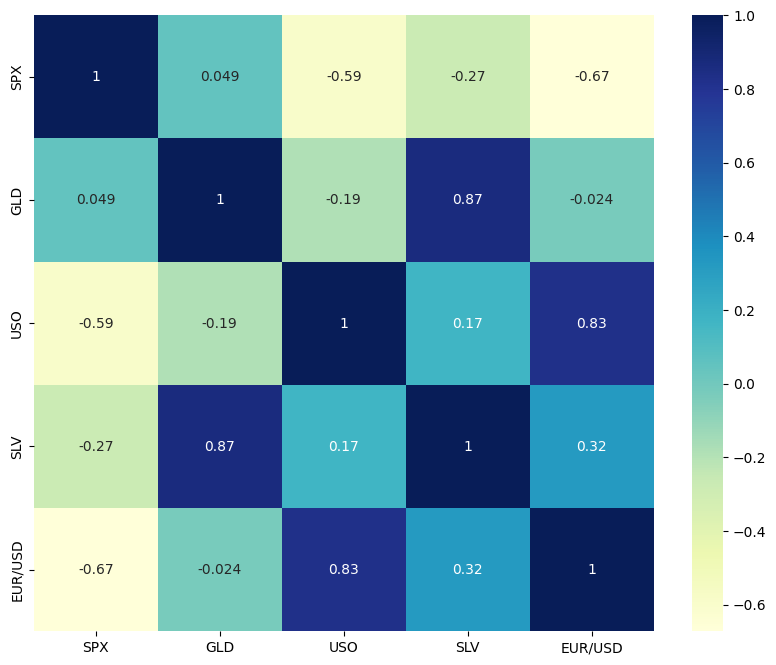

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

**getting features and targets**

In [51]:
X = df.drop(['GLD','Date'], axis=1)
Y = df['GLD']

**splitting the data in training and test data**

In [52]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

**seeing the gistriubution of gold price**

<ipython-input-53-702cdebab2f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

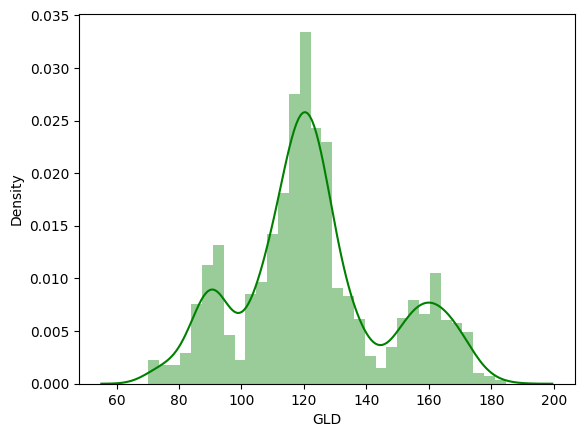

In [53]:
sns.distplot(df['GLD'], color='green')

most of the gold prices are in the region of 120 price

now we show the scatterplot of gold_price with time using seaborn libary  
---from below scatter plot we can see maximum price of Gold lies around year 2012

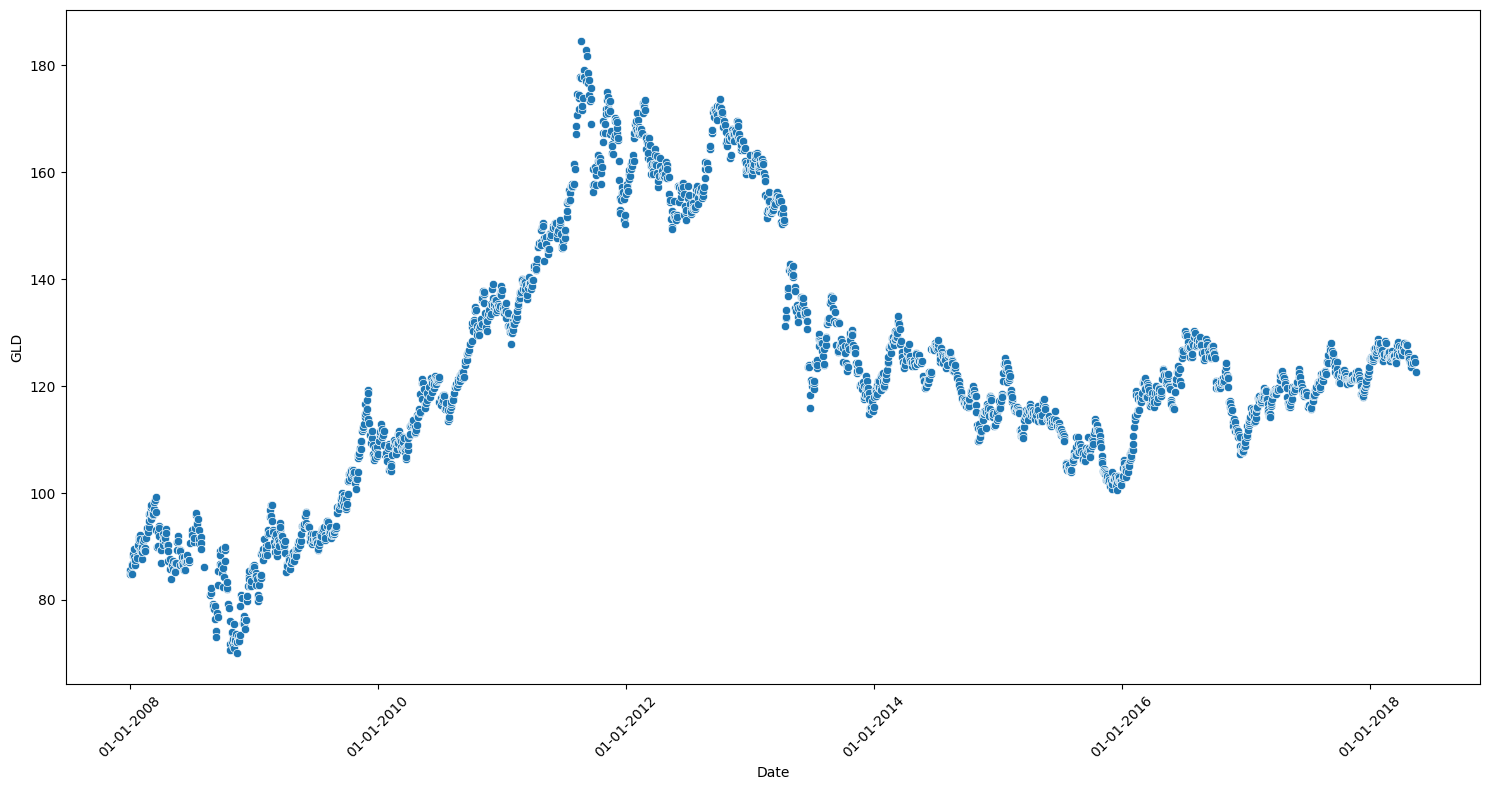

In [108]:
plt.figure(figsize=(15,8))
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Date' column to datetime if it's not already in the proper format
data_format = mdates.DateFormatter("%d-%m-%Y")

sns.scatterplot( data = df, x='Date', y ='GLD')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Evaluation of model**

In [54]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

**predicting the values of gold price(Y_test_prediction) from test data (X_test) and calculating the error condsidering the acutal values of gold (Y_test) and predicted values of gold(Y_test_prediction)**

In [63]:
Y_test_prediction = model.predict(X_test)
r_square = metrics.r2_score(Y_test, Y_test_prediction)
print(r_square)


0.9893964390184922


from above result: the value of r_square is very close to 1 hence our model behaves very well

**plotting the actual gold price and predicted values of gold price**

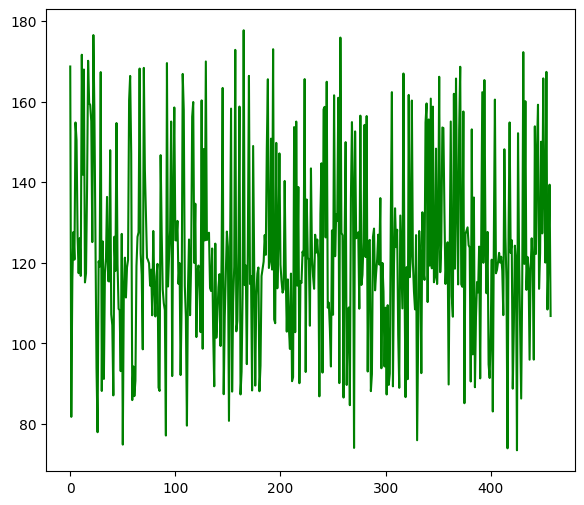

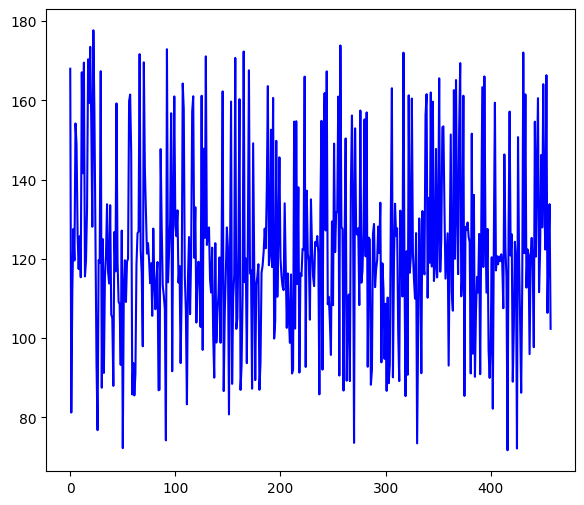

In [84]:
Predicted_price = list(Y_test_prediction)
actual_price = list(Y_test)


plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(Predicted_price,color = 'green', label = 'predicted_price')
plt.show()

plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
plt.plot(actual_price, color = 'blue', label = 'Actual_price')
plt.show()


**plotting actual_price and predicted_price on the same plot**

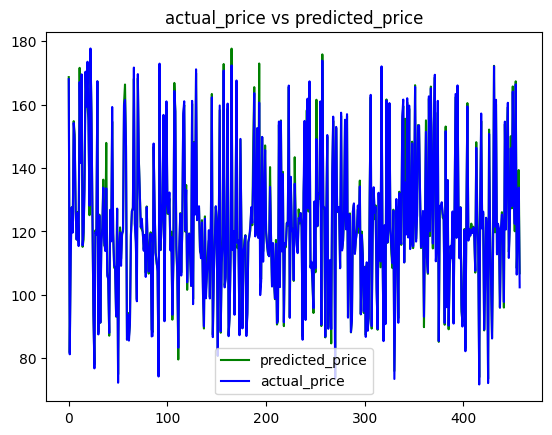

In [85]:
plt.plot(Predicted_price, color = 'green', label = 'predicted_price')
plt.plot(actual_price, color = 'blue', label = 'actual_price')
plt.title('actual_price vs predicted_price')
plt.legend()
plt.show()

**printing first 9 elements of both lists predicted and actual list to see the difference**

In [88]:
print("predicted_price: ", Predicted_price[0:10])
print("actual_price: ", actual_price[0:10])

predicted_price:  [168.68709918999997, 81.76959989000005, 115.86229994, 127.63090093000007, 120.77220145999996, 154.80079737, 150.45439914000002, 126.34500018000003, 117.4117987300001, 126.11290033999998]
actual_price:  [168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998]


Thus from above results we can say that predicted values of gold price are slightly higher then actual price